In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image


In [ ]:
# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 0s 0us/step


In [ ]:
# Load and preprocess the image
img_path = '/content/drive/MyDrive/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [ ]:
# Get predictions
predictions = model.predict(img_array)

1/1 [==============================] - 0s 325ms/step


In [ ]:
# Decode predictions
decoded_predictions = decode_predictions(predictions)


In [ ]:
# Display the top predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
    print(f"{i + 1}: {label} ({score:.2f})")

1: Indian_elephant (0.85)
2: tusker (0.08)
3: African_elephant (0.07)
4: Arabian_camel (0.00)
5: water_buffalo (0.00)


In [ ]:
# Display the image with bounding boxes
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
# Draw bounding boxes on the image
for _, label, score in decoded_predictions[0]:
    if score > 0.5:  # Adjust the threshold based on your needs
        print(f"Object: {label}, Score: {score}")
        cv2.putText(
            img,
            f"{label}: {score:.2f}",
            (50, 50),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (255, 0, 0),
            2,
            cv2.LINE_AA,
        )

Object: Indian_elephant, Score: 0.8485648036003113


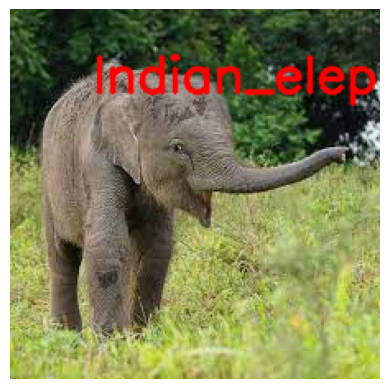

In [ ]:
# Display the image with bounding boxes
import matplotlib.pyplot as plt  # Import the necessary module
plt.imshow(img)
plt.axis('off')
plt.show()